# How to build wave surface file from artemis amplitude and phase file

The script below will build a 2d file containing the wave surface from an amplitude and phase file generated by artemis. 

This is done automatically if the keyword FREE SURFACE ANIMATION is set to YES in the artemis steering file.

In [1]:
!run_telfile.py amp2wave -h



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

usage: run_telfile.py amp2wave [-h] [--start-time START_TIME]
                               [--time-step TIME_STEP] [--end-time END_TIME]
                               [--force]
                               amp_file wave_file

positional arguments:
  amp_file              path of the amplitude and phase file.
  wave_file             path of the wave file.

optional arguments:
  -h, --help            show this help message and exit
  --start-time START_TIME
                        Time from which the wave file will start.
  --time-step TIME_STEP
                        Time step for the wave file.
  --end-time END_TIME   Time for which the wave file will end.
  --force               Overwrite wave file if it exists


Here we will use the file generated by the test case artemis/bj78/art_bj78_animated.cas

We want a wave surface file that as a time range of [10000.0, 12047.5] with a time step of 0.1

In [2]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/artemis/bj78
!run_telfile.py amp2wave famp_bj78_20per.slf fs_bj78_animated.slf --start-time=10000.0 --time-step=0.1 --end-time=12047.5 --force



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


      > Input signal based on:
      - 1 direction(s)
      - for the following periods: [0.91958028 1.11807907 1.25589597 1.36833906 1.46719337 1.55623984
 1.63188291 1.69124401 1.73767447 1.77579975 1.80918562 1.83985412
 1.86946642 1.89928448 1.93096983 1.96711433 2.01255965 2.07669711
 2.18311071 2.40360236]

      > Going through time (20475 time steps) :




My work is done




Here is a display of wave surface at the last time step of the file

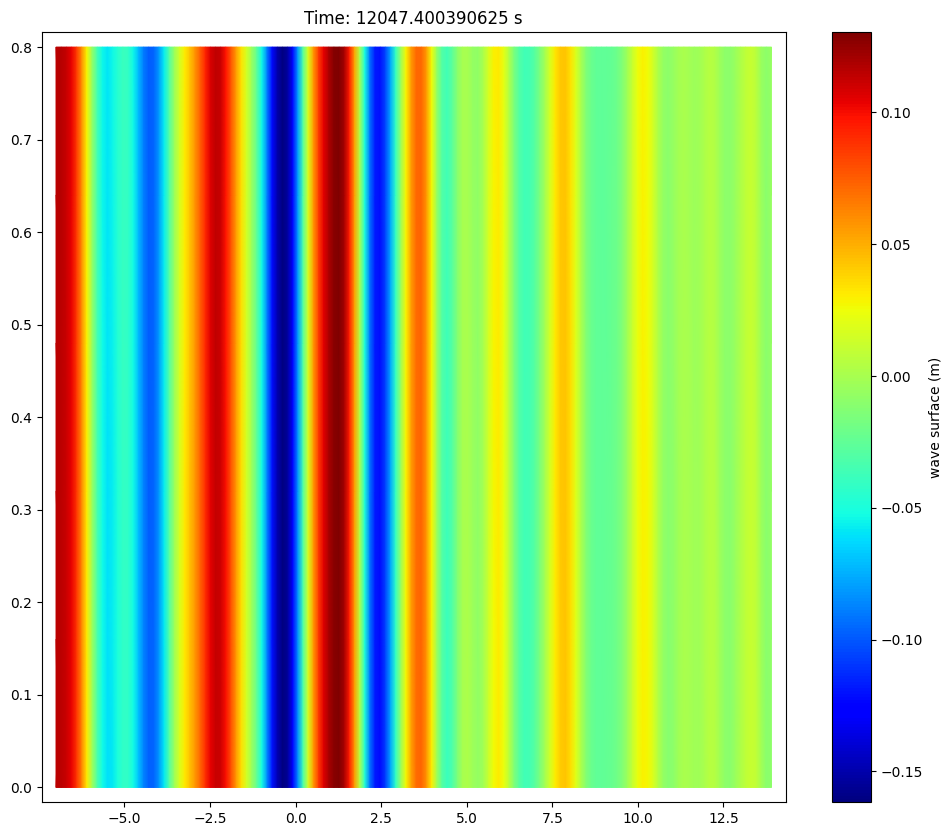

In [3]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import *

file_name = path.join(environ["HOMETEL"], "examples", "artemis", "bj78", "fs_bj78_animated.slf")

res = TelemacFile(file_name)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

water_surface = res.get_data_value("WAVE SURFACE", -1)

plot2d_scalar_map(fig, ax, res.tri, water_surface, data_name='wave surface (m)',)
ax.set_title("Time: {} s".format(res.times[-1]))

plt.show()
plt.close(fig)

In [4]:
!run_telfile.py scan fs_bj78_animated.slf --data



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~> Generic info

  - Title: ARTEMIS VALIDATION - TEST Battjes & Janssen 1978, RUN 15
  - No date in file
  - Format: SERAFIN
  - Endianess:  BIG_ENDIAN
  - Precision: Single precision

~> Mesh info

  - Number of dimensions: 2
  - Element type: triangle
  - Number of points: 842
  - Number of elements: 1394
  - Number of points per element: 3
  - Number of planes: 1

  +> Coordinates

    - X offset, Y offset = 0, 0
    - X range [-7.0, 13.899999618530273]
    - Y range [0.0, 0.800000011920929]

~> Parallel info

  - No parallel information

~> Boundary info

  - No boundary file given

~> Data info

  - Number of records: 20475


  - Time range: [10000.0, 12047.400390625]
  - Number of variables: 1
    - Name: WAVE SURFACE     Unit: M

  - WAVE SURFACE
    +> Time: 10000.0s min, max:  [-0.10060768574476242, 0.0776505395770073]
    +> Time: 10000.099609375s min, max:  [-0.09652228653430939, 0.0807509645819664]
    +> Time: 10000.2001953125s min, max:  [-0.09338013082742691, 0.08694705367088318]
    +> Time: 10000.2998046875s min, max:  [-0.0896233543753624, 0.09242808073759079]
    +> Time: 10000.400390625s min, max:  [-0.09225939214229584, 0.09707936644554138]
    +> Time: 10000.5s min, max:  [-0.1081702783703804, 0.10082145035266876]
    +> Time: 10000.599609375s min, max:  [-0.11031743139028549, 0.10361867398023605]
    +> Time: 10000.7001953125s min, max:  [-0.11165003478527069, 0.10589362680912018]
    +> Time: 10000.7998046875s min, max:  [-0.11183828860521317, 0.10874631255865097]
    +> Time: 10000.900390625s min, max:  [-0.11137691140174866, 0.11059313267469406]
    +> Time: 10001.0s min, max:  [-0.1116

    +> Time: 10107.900390625s min, max:  [-0.07453404366970062, 0.09618717432022095]
    +> Time: 10108.0s min, max:  [-0.07429380714893341, 0.09312016516923904]
    +> Time: 10108.099609375s min, max:  [-0.07473759353160858, 0.09137339144945145]
    +> Time: 10108.2001953125s min, max:  [-0.0756177306175232, 0.09118299931287766]
    +> Time: 10108.2998046875s min, max:  [-0.07643637806177139, 0.09288927912712097]
    +> Time: 10108.400390625s min, max:  [-0.07704769819974899, 0.09410429000854492]
    +> Time: 10108.5s min, max:  [-0.0772775337100029, 0.09486839175224304]
    +> Time: 10108.599609375s min, max:  [-0.077012799680233, 0.09523038566112518]
    +> Time: 10108.7001953125s min, max:  [-0.07623904943466187, 0.09522941708564758]
    +> Time: 10108.7998046875s min, max:  [-0.0919109508395195, 0.0951218232512474]
    +> Time: 10108.900390625s min, max:  [-0.10504959523677826, 0.09483269602060318]
    +> Time: 10109.0s min, max:  [-0.10463117808103561, 0.09430581331253052]
    +>

    +> Time: 10329.900390625s min, max:  [-0.12209523469209671, 0.08011206239461899]
    +> Time: 10330.0s min, max:  [-0.12001396715641022, 0.07996420562267303]
    +> Time: 10330.099609375s min, max:  [-0.11800963431596756, 0.07944248616695404]
    +> Time: 10330.2001953125s min, max:  [-0.11676163226366043, 0.07869451493024826]
    +> Time: 10330.2998046875s min, max:  [-0.1162392869591713, 0.07780618965625763]
    +> Time: 10330.400390625s min, max:  [-0.1155591681599617, 0.07849889993667603]
    +> Time: 10330.5s min, max:  [-0.11453382670879364, 0.0822320282459259]
    +> Time: 10330.599609375s min, max:  [-0.113045834004879, 0.08529341220855713]
    +> Time: 10330.7001953125s min, max:  [-0.1110960990190506, 0.08765950798988342]
    +> Time: 10330.7998046875s min, max:  [-0.11007463932037354, 0.08940242230892181]
    +> Time: 10330.900390625s min, max:  [-0.10915782302618027, 0.09062901884317398]
    +> Time: 10331.0s min, max:  [-0.10797619819641113, 0.09144731611013412]
    +>

    +> Time: 10530.0s min, max:  [-0.08791504055261612, 0.06818363070487976]
    +> Time: 10530.099609375s min, max:  [-0.08651135116815567, 0.06815628707408905]
    +> Time: 10530.2001953125s min, max:  [-0.08497714251279831, 0.0680091455578804]
    +> Time: 10530.2998046875s min, max:  [-0.08300940692424774, 0.06799928843975067]
    +> Time: 10530.400390625s min, max:  [-0.08058026432991028, 0.06798973679542542]
    +> Time: 10530.5s min, max:  [-0.07767115533351898, 0.06768788397312164]
    +> Time: 10530.599609375s min, max:  [-0.07511160522699356, 0.06920894235372543]
    +> Time: 10530.7001953125s min, max:  [-0.07290425896644592, 0.07206302136182785]
    +> Time: 10530.7998046875s min, max:  [-0.07677850127220154, 0.07462575286626816]
    +> Time: 10530.900390625s min, max:  [-0.08254320174455643, 0.07690498977899551]
    +> Time: 10531.0s min, max:  [-0.08013071119785309, 0.07868783175945282]
    +> Time: 10531.099609375s min, max:  [-0.07737549394369125, 0.08000396192073822]
 

    +> Time: 10736.5s min, max:  [-0.09347768872976303, 0.08168931305408478]
    +> Time: 10736.599609375s min, max:  [-0.0952564999461174, 0.07990903407335281]
    +> Time: 10736.7001953125s min, max:  [-0.0966918021440506, 0.07784979045391083]
    +> Time: 10736.7998046875s min, max:  [-0.09780626744031906, 0.07548093050718307]
    +> Time: 10736.900390625s min, max:  [-0.0985463410615921, 0.07287643849849701]
    +> Time: 10737.0s min, max:  [-0.09887593984603882, 0.07345261424779892]
    +> Time: 10737.099609375s min, max:  [-0.09905370324850082, 0.07381991297006607]
    +> Time: 10737.2001953125s min, max:  [-0.09905353933572769, 0.08344043791294098]
    +> Time: 10737.2998046875s min, max:  [-0.09892403334379196, 0.09730919450521469]
    +> Time: 10737.400390625s min, max:  [-0.09864246100187302, 0.095685675740242]
    +> Time: 10737.5s min, max:  [-0.09815219044685364, 0.09352409839630127]
    +> Time: 10737.599609375s min, max:  [-0.09742323309183121, 0.09086694568395615]
    +

    +> Time: 10922.7001953125s min, max:  [-0.0689348429441452, 0.10701598227024078]
    +> Time: 10922.7998046875s min, max:  [-0.07069046795368195, 0.10638417303562164]
    +> Time: 10922.900390625s min, max:  [-0.0731210708618164, 0.10540144145488739]
    +> Time: 10923.0s min, max:  [-0.07631205022335052, 0.10416483879089355]
    +> Time: 10923.099609375s min, max:  [-0.07922351360321045, 0.1026647612452507]
    +> Time: 10923.2001953125s min, max:  [-0.08176255226135254, 0.10086864233016968]
    +> Time: 10923.2998046875s min, max:  [-0.08384203165769577, 0.09879926592111588]
    +> Time: 10923.400390625s min, max:  [-0.08547607064247131, 0.09650758653879166]
    +> Time: 10923.5s min, max:  [-0.08675611019134521, 0.09400825947523117]
    +> Time: 10923.599609375s min, max:  [-0.08823264390230179, 0.09129142761230469]
    +> Time: 10923.7001953125s min, max:  [-0.08996861428022385, 0.0883922204375267]
    +> Time: 10923.7998046875s min, max:  [-0.091379314661026, 0.085409939289093

    +> Time: 11194.7998046875s min, max:  [-0.1094072014093399, 0.06188680976629257]
    +> Time: 11194.900390625s min, max:  [-0.11026965081691742, 0.05782454460859299]
    +> Time: 11195.0s min, max:  [-0.11046185344457626, 0.053506944328546524]
    +> Time: 11195.099609375s min, max:  [-0.11096573621034622, 0.05134109780192375]
    +> Time: 11195.2001953125s min, max:  [-0.11138305068016052, 0.05268784239888191]
    +> Time: 11195.2998046875s min, max:  [-0.11127077043056488, 0.05392559617757797]
    +> Time: 11195.400390625s min, max:  [-0.11092372238636017, 0.05501740425825119]
    +> Time: 11195.5s min, max:  [-0.11007153242826462, 0.05702097341418266]
    +> Time: 11195.599609375s min, max:  [-0.10875364392995834, 0.061893071979284286]
    +> Time: 11195.7001953125s min, max:  [-0.10696554183959961, 0.06629950553178787]
    +> Time: 11195.7998046875s min, max:  [-0.1046704351902008, 0.07019393891096115]
    +> Time: 11195.900390625s min, max:  [-0.10187260806560516, 0.0735322162

    +> Time: 11362.0s min, max:  [-0.08105290681123734, 0.047318145632743835]
    +> Time: 11362.099609375s min, max:  [-0.07997848838567734, 0.04938022047281265]
    +> Time: 11362.2001953125s min, max:  [-0.07846727967262268, 0.052047669887542725]
    +> Time: 11362.2998046875s min, max:  [-0.07665248215198517, 0.05494127795100212]
    +> Time: 11362.400390625s min, max:  [-0.07474148273468018, 0.057730335742235184]
    +> Time: 11362.5s min, max:  [-0.07285618782043457, 0.06045849993824959]
    +> Time: 11362.599609375s min, max:  [-0.07096780836582184, 0.06306266039609909]
    +> Time: 11362.7001953125s min, max:  [-0.06897923350334167, 0.0653919205069542]
    +> Time: 11362.7998046875s min, max:  [-0.06682860106229782, 0.06732793897390366]
    +> Time: 11362.900390625s min, max:  [-0.06450565904378891, 0.06887990236282349]
    +> Time: 11363.0s min, max:  [-0.06202644854784012, 0.0701514258980751]
    +> Time: 11363.099609375s min, max:  [-0.05944707989692688, 0.07124084234237671]

    +> Time: 11521.5s min, max:  [-0.09314174950122833, 0.09948420524597168]
    +> Time: 11521.599609375s min, max:  [-0.08945201337337494, 0.09794624149799347]
    +> Time: 11521.7001953125s min, max:  [-0.08795750886201859, 0.09610608220100403]
    +> Time: 11521.7998046875s min, max:  [-0.08422473073005676, 0.09390664845705032]
    +> Time: 11521.900390625s min, max:  [-0.07871563732624054, 0.09238174557685852]
    +> Time: 11522.0s min, max:  [-0.07843609899282455, 0.09099061042070389]
    +> Time: 11522.099609375s min, max:  [-0.07645025849342346, 0.08924275636672974]
    +> Time: 11522.2001953125s min, max:  [-0.07518620789051056, 0.08721006661653519]
    +> Time: 11522.2998046875s min, max:  [-0.07663235068321228, 0.084989532828331]
    +> Time: 11522.400390625s min, max:  [-0.07781557738780975, 0.08263633400201797]
    +> Time: 11522.5s min, max:  [-0.07873263210058212, 0.08012527227401733]
    +> Time: 11522.599609375s min, max:  [-0.07936885207891464, 0.07741296291351318]
  

    +> Time: 11773.5s min, max:  [-0.1368355005979538, 0.11476843059062958]
    +> Time: 11773.599609375s min, max:  [-0.13735657930374146, 0.1340406835079193]
    +> Time: 11773.7001953125s min, max:  [-0.13662412762641907, 0.13413944840431213]
    +> Time: 11773.7998046875s min, max:  [-0.13450056314468384, 0.1332135647535324]
    +> Time: 11773.900390625s min, max:  [-0.13098284602165222, 0.13124696910381317]
    +> Time: 11774.0s min, max:  [-0.12802541255950928, 0.12833881378173828]
    +> Time: 11774.099609375s min, max:  [-0.1248817965388298, 0.12711821496486664]
    +> Time: 11774.2001953125s min, max:  [-0.12096040695905685, 0.12461729347705841]
    +> Time: 11774.2998046875s min, max:  [-0.11621694266796112, 0.123472660779953]
    +> Time: 11774.400390625s min, max:  [-0.11071962118148804, 0.12404300272464752]
    +> Time: 11774.5s min, max:  [-0.10482955724000931, 0.12648016214370728]
    +> Time: 11774.599609375s min, max:  [-0.09996859729290009, 0.1304030418395996]
    +> 

    +> Time: 12042.099609375s min, max:  [-0.1128758117556572, 0.13359303772449493]
    +> Time: 12042.2001953125s min, max:  [-0.1263042837381363, 0.12933315336704254]
    +> Time: 12042.2998046875s min, max:  [-0.13718046247959137, 0.12366359680891037]
    +> Time: 12042.400390625s min, max:  [-0.137522354722023, 0.11765066534280777]
    +> Time: 12042.5s min, max:  [-0.14020030200481415, 0.11250580847263336]
    +> Time: 12042.599609375s min, max:  [-0.14389072358608246, 0.10605515539646149]
    +> Time: 12042.7001953125s min, max:  [-0.14816124737262726, 0.1002054437994957]
    +> Time: 12042.7998046875s min, max:  [-0.15085344016551971, 0.10328635573387146]
    +> Time: 12042.900390625s min, max:  [-0.15525007247924805, 0.10765643417835236]
    +> Time: 12043.0s min, max:  [-0.15868091583251953, 0.11303993314504623]
    +> Time: 12043.099609375s min, max:  [-0.16057689487934113, 0.13395315408706665]
    +> Time: 12043.2001953125s min, max:  [-0.16084662079811096, 0.144358605146408